In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns 
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
#Loading the Dataset
store = pd.read_csv("C:/Users/anjum/Downloads/SampleSuperstore.csv")

In [3]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


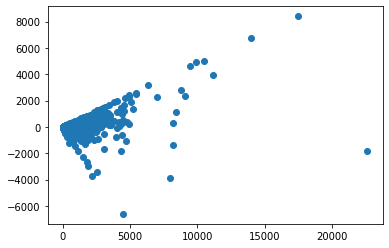

In [7]:
# finding the correlation between the columns 'Profit','Sales'

plt.scatter(x = store['Sales'] , y = store['Profit'])
plt.show()

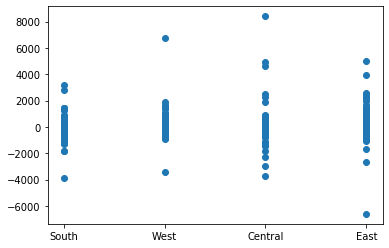

In [9]:
# finding the correlation between the columns 'Profit','Region'

plt.scatter(x = store['Region'] , y = store['Profit'])
plt.show()

Text(0.5, 1, 'Profit Vs Segment')

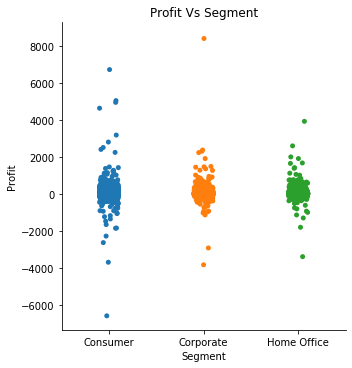

In [10]:
# Segment VS Profit

sns.catplot(x="Segment",y="Profit",data=store)
plt.xlabel("Segment")

plt.title('Profit Vs Segment')


Segment wise home office is the weaker area accordinfg to Profit

Text(0.5, 1, 'Profit Vs Region')

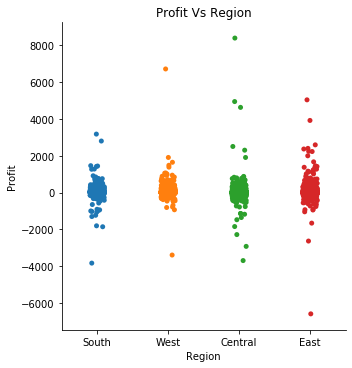

In [26]:
# Segment VS Profit

sns.catplot(x="Region",y="Profit",data=store)
plt.xlabel("Region")

plt.title('Profit Vs Region')

 West area is weak basis of profit 

Text(0.5, 1, 'Profit Vs Category')

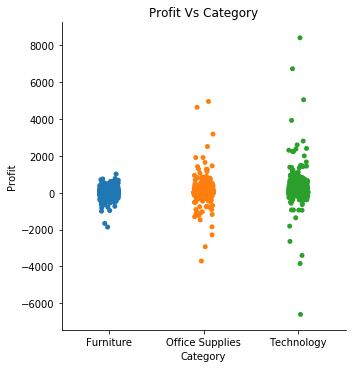

In [11]:
# Segment VS Profit

sns.catplot(x="Category",y="Profit",data=store)
plt.xlabel("Category")

plt.title('Profit Vs Category')


In [13]:
cate = store[['Category','Profit']]
cate_grp = cate.groupby('Category').Profit.sum()
cat = cate_grp.reset_index()
cat

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


Text(0.5, 1.0, 'Category Vs Profit')

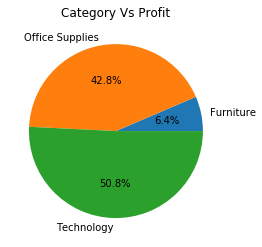

In [15]:
plt.pie(cat['Profit'],labels=cat['Category'],autopct='%1.1f%%')
plt.title('Category Vs Profit')


Category for Furniture is a weaker on the basis profit

In [16]:
sub_cat = store[['Sub-Category','Profit']]
cat_grp = sub_cat.groupby('Sub-Category').Profit.sum()
scat = cat_grp.reset_index()
scat

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


Bookcases, Supplies and Tables is the lowest from the sub category list

Text(0.5, 1.0, 'Sub-Category Vs Profit')

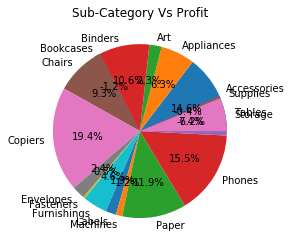

In [18]:
plt.pie(scat['Profit'],labels=scat['Sub-Category'],autopct='%1.1f%%')
plt.title('Sub-Category Vs Profit')


[Text(0, 0.5, 'Profit'),
 Text(0.5, 0, 'Discount'),
 Text(0.5, 1.0, 'Box Plot On Profit Across Discount')]

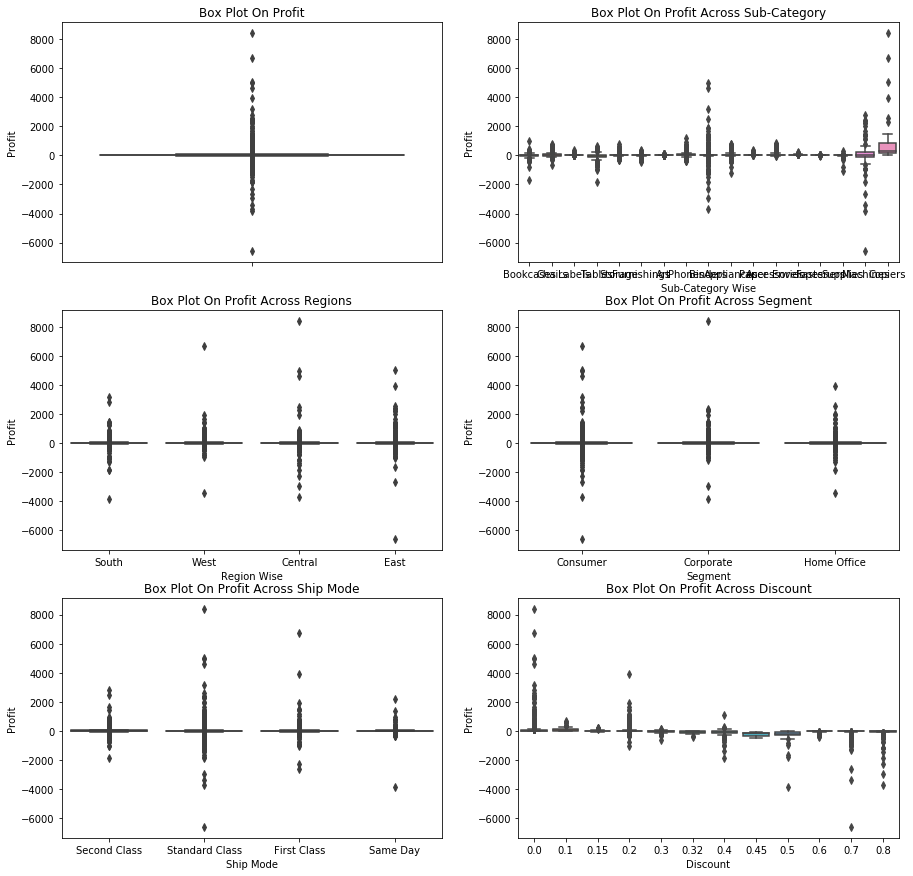

In [20]:
#Box plot
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=store,y="Profit",orient="v",ax=axes[0][0])
sns.boxplot(data=store,y="Profit",x="Sub-Category",orient="v",ax=axes[0][1])
sns.boxplot(data=store,y="Profit",x="Region",orient="v",ax=axes[1][0])
sns.boxplot(data=store,y="Profit",x="Segment",orient="v",ax=axes[1][1])
sns.boxplot(data=store,y="Profit",x="Ship Mode",orient="v",ax=axes[2][0])
sns.boxplot(data=store,y="Profit",x="Discount",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Profit',title="Box Plot On Profit")
axes[0][1].set(xlabel='Sub-Category Wise', ylabel='Profit',title="Box Plot On Profit Across Sub-Category")
axes[1][0].set(xlabel='Region Wise', ylabel='Profit',title="Box Plot On Profit Across Regions")
axes[1][1].set(xlabel='Segment', ylabel='Profit',title="Box Plot On Profit Across Segment")
axes[2][0].set(xlabel='Ship Mode', ylabel='Profit',title="Box Plot On Profit Across Ship Mode")
axes[2][1].set(xlabel='Discount', ylabel='Profit',title="Box Plot On Profit Across Discount")

In [23]:
# Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
#converting into binary
lb = LabelEncoder()
store["Ship Mode"] = lb.fit_transform(store["Ship Mode"])
store["Segment"] = lb.fit_transform(store["Segment"])
store["Country"] = lb.fit_transform(store["Country"])
store["Category"] = lb.fit_transform(store["Category"])
store["Sub-Category"] = lb.fit_transform(store["Sub-Category"])


In [21]:
#check Null values
store.isnull().values.any()

False

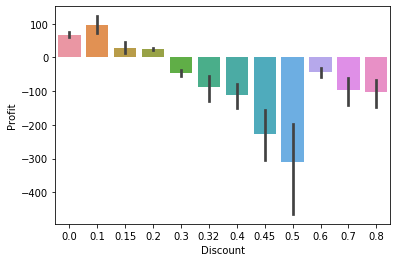

In [24]:
# Data Exploration
sns.barplot(x='Discount', y='Profit', data=store)


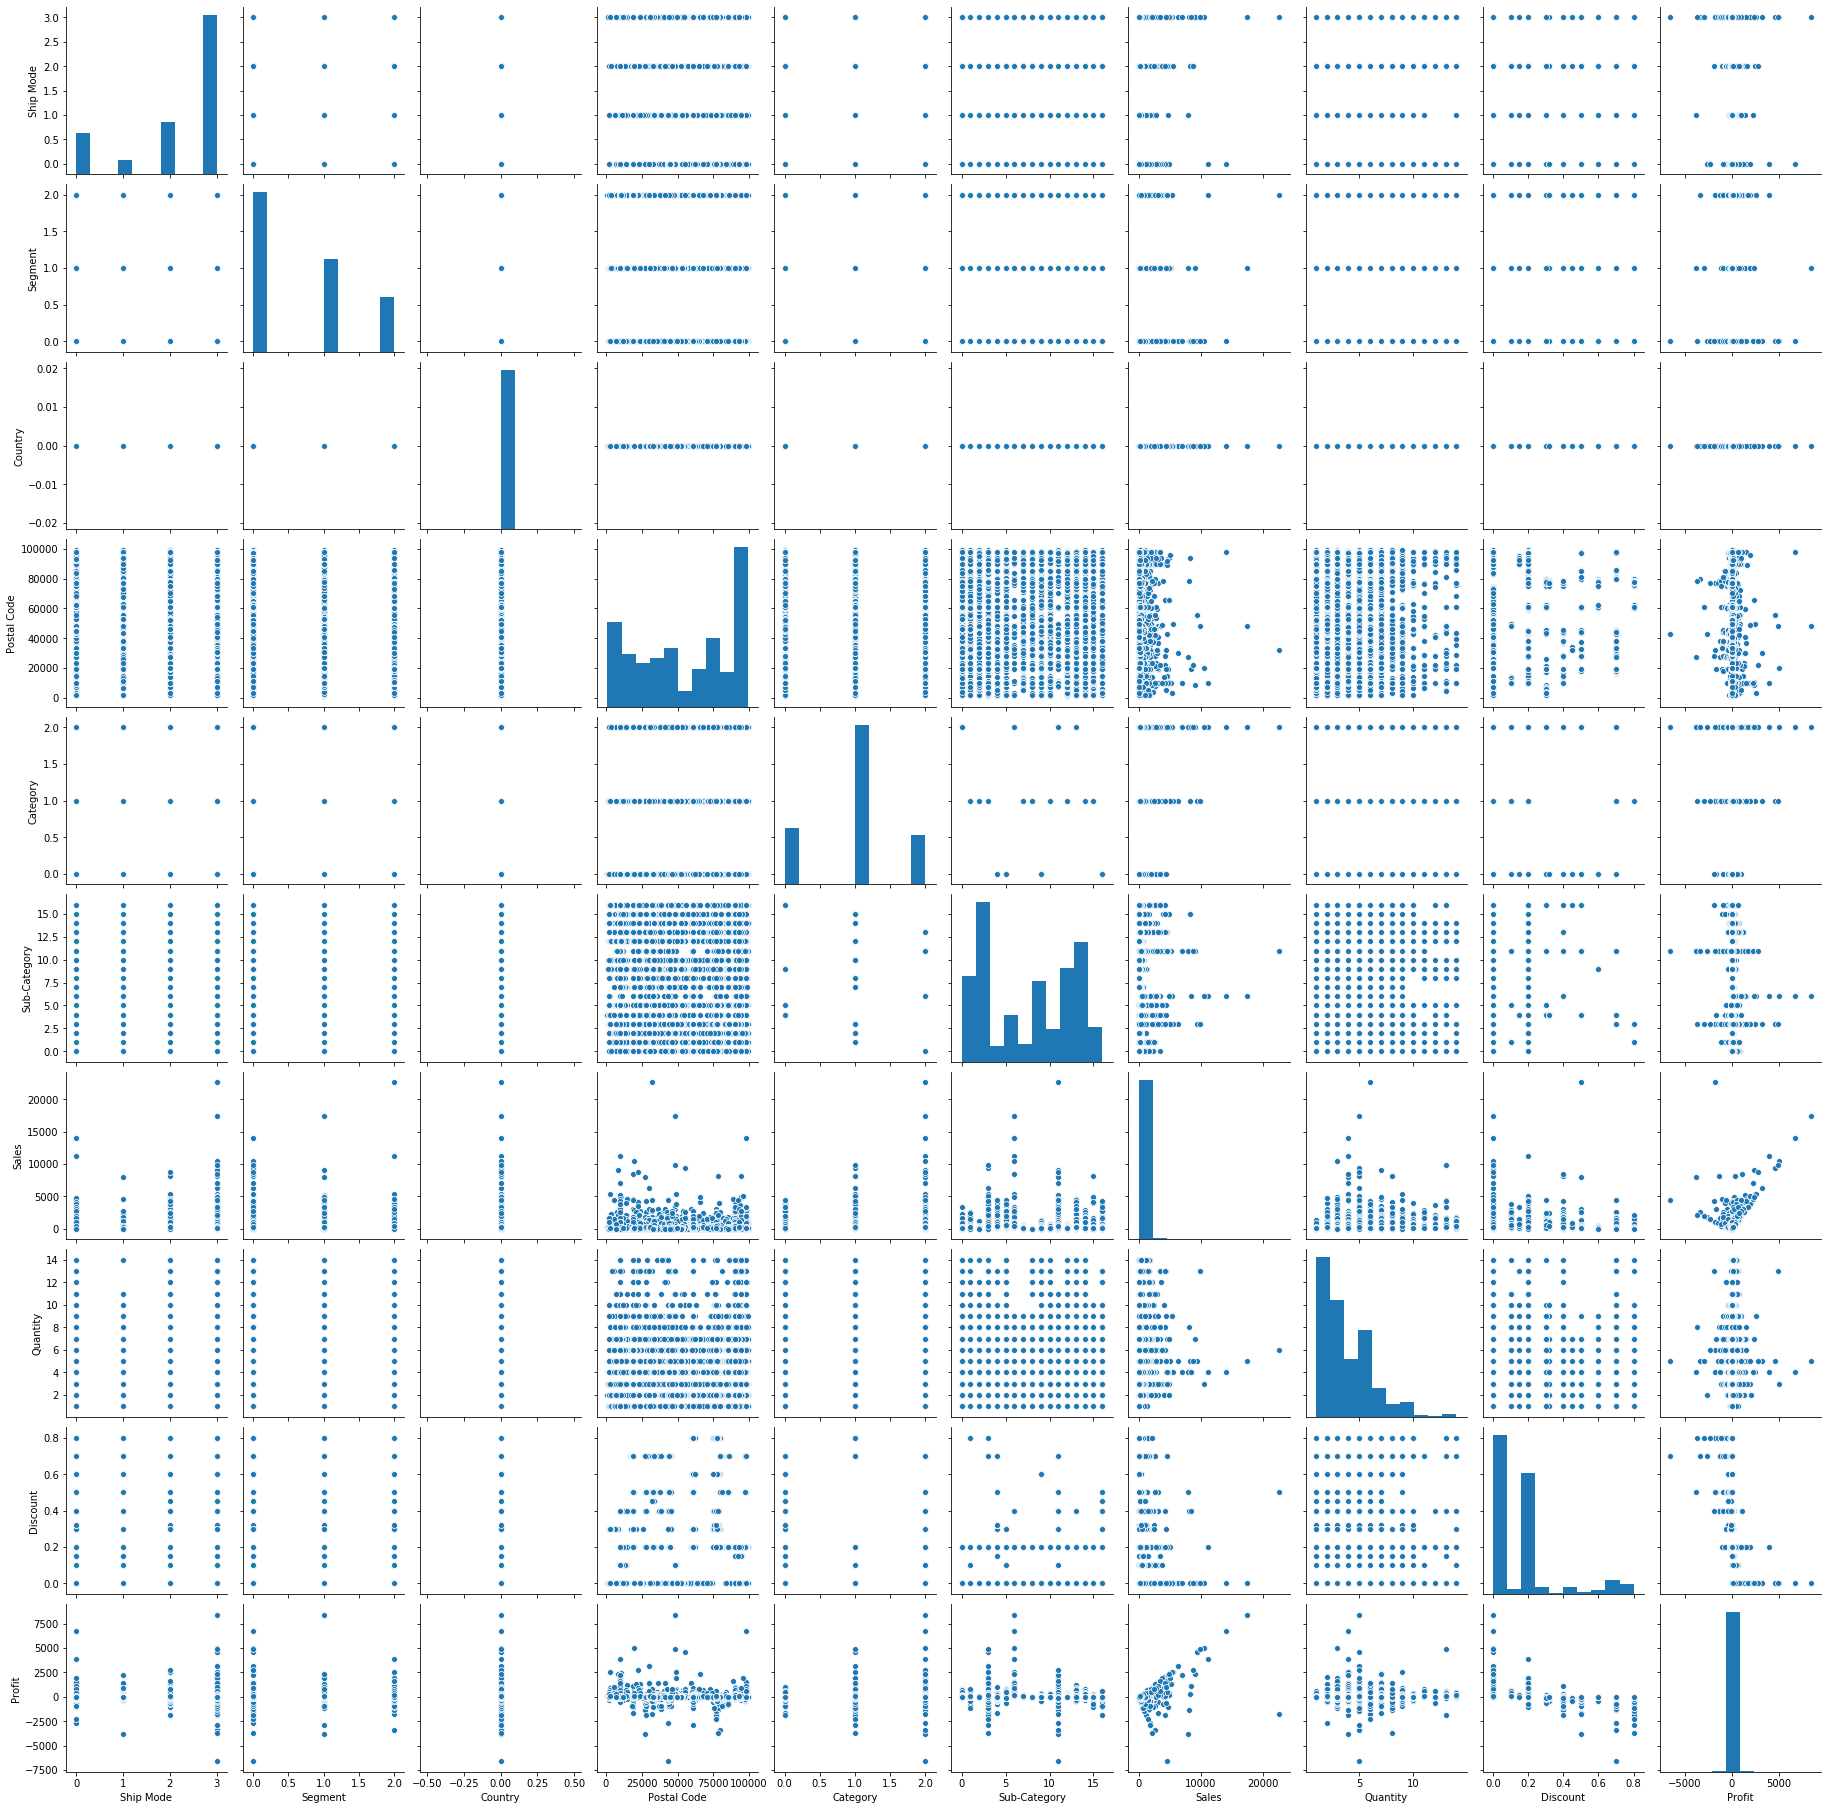

In [25]:
sns.pairplot(store)